## Day 35 Lecture 1 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing survival rates after breast cancer surgery loaded below and analyze the model generated for this dataset.

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [5]:
# Attributes:
# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
#  -- 1 = the patient survived 5 years or longer
#  -- 2 = the patient died within 5 year

cols = ['age', 'op_year', 'nodes', 'survival']
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/haberman.data', names=cols)

In [6]:
cancer.head()

,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Check for missing data and remove all rows containing missing data

In [7]:
# answer below:
cancer.isna().sum()


age         0
op_year     0
nodes       0
survival    0
dtype: int64

In [ ]:
#none

Adjust the target variable so that it has values of either 0 or 1

In [8]:
# answer below:
cancer['survival'] = cancer['survival']-1 


In [23]:
cancer['survival'].value_counts()

0    225
1     81
Name: survival, dtype: int64

Create a dummy variable from the number of nodes

In [13]:
# answer below:
cancer = pd.get_dummies(cancer, columns = ['nodes'], drop_first = True)
cancer

,age,op_year,survival,nodes_1,nodes_2,nodes_3,nodes_4,nodes_5,nodes_6,nodes_7,...,nodes_21,nodes_22,nodes_23,nodes_24,nodes_25,nodes_28,nodes_30,nodes_35,nodes_46,nodes_52
0,30,64,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,62,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31,59,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31,65,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,75,62,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,76,67,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,77,65,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304,78,65,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split the data into train and test (20% in test)

In [16]:
# answer below:
X = cancer.drop(columns=["survival"])
y = cancer["survival"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69, stratify=y
)


Create a gradient boosted classification algorithm with a learning rate of 0.01 and max depth of 5. Report the accuracy.

In [22]:
# answer below:
model = XGBClassifier(max_depth = 5, learning_rate = .01)
model.fit(X_train, y_train)



train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)


print(f'Train score is: {train_score}' )
print(f'Train score is: {test_score}' )

Train score is: 0.7540983606557377
Train score is: 0.7419354838709677


Print the confusion matrix for the test data. What do you notice about our predictions?

In [24]:
# answer below:
y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)


array([[46,  0],
       [16,  0]], dtype=int64)

Print the confusion matrix for a learning rate of 1 and a learning rate of 0.5. What do you see now that stands out to you in the confusion matrix?

In [27]:
model = XGBClassifier(max_depth = 5, learning_rate = 1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[33, 13],
       [ 6, 10]], dtype=int64)

In [28]:
model = XGBClassifier(max_depth = 5, learning_rate = .5)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[35, 11],
       [ 9,  7]], dtype=int64)

In [0]:
# answer below:



Perform a grid search for the optimal learning rate.

In [41]:
pipeline = Pipeline([
    ('XGB', XGBClassifier(max_depth = 5))
])

In [42]:
params = {
'XGB__learning_rate': [.05, .06, .07, .08, .09,.1,.12,.13,.14,.15] 
}
    

In [43]:
pipeline_cv = GridSearchCV(pipeline, params, verbose=1, cv=2)
pipeline_cv.fit(X_train, y_train)

pipeline_cv.best_params_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


{'XGB__learning_rate': 0.05}

In [44]:
# answer below:
pipeline_cv.fit(X_train, y_train)
y_pred = pipeline_cv.predict(X_test)

confusion_matrix(y_test, y_pred)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


array([[42,  4],
       [13,  3]], dtype=int64)

List the feature importances for the model with the optimal learning rate.

In [58]:
from xgboost import plot_importance
# answer below:
plot_importance(pipeline_cv.best_estimator_)

ValueError: tree must be Booster, XGBModel or dict instance

In [59]:
model = XGBClassifier(max_depth = 5, learning_rate = .05)
model.fit(X_train, y_train)
y_pred = pipeline_cv.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[42,  4],
       [13,  3]], dtype=int64)

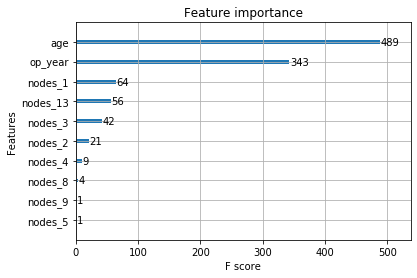

In [60]:
plot_importance(model)